# 1. scaling

In [82]:
import pandas as pd

In [83]:
df=pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Social-Networks-Ads/master/Social_Network_Ads.csv")

In [84]:
df.to_csv("social_net_ads.csv",index=False)

In [85]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [86]:
df=df.iloc[:,2:]

In [87]:
df

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0
1,35.0,20000.0,0
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,0
...,...,...,...
395,46.0,41000.0,1
396,51.0,23000.0,1
397,50.0,20000.0,1
398,36.0,33000.0,0


# train test split

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
df

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0
1,35.0,20000.0,0
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,0
...,...,...,...
395,46.0,41000.0,1
396,51.0,23000.0,1
397,50.0,20000.0,1
398,36.0,33000.0,0


In [91]:
df.drop("Purchased",axis=1)

,Age,EstimatedSalary
0,19.0,19000.0
1,35.0,20000.0
2,26.0,43000.0
3,27.0,57000.0
4,19.0,76000.0
...,...,...
395,46.0,41000.0
396,51.0,23000.0
397,50.0,20000.0
398,36.0,33000.0


In [92]:
df["Purchased"]

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [93]:
df.shape

(400, 3)

In [94]:
X_train,X_test,y_train,y_test=train_test_split(df.drop("Purchased",axis=1),df["Purchased"],test_size=0.25)

In [95]:
X_train

,Age,EstimatedSalary
170,21.0,88000.0
328,36.0,118000.0
226,36.0,126000.0
264,48.0,90000.0
269,40.0,61000.0
...,...,...
291,49.0,89000.0
366,58.0,47000.0
20,45.0,22000.0
297,43.0,112000.0


In [96]:
X_test

,Age,EstimatedSalary
75,34.0,112000.0
106,26.0,35000.0
39,27.0,31000.0
399,49.0,36000.0
110,39.0,71000.0
...,...,...
151,41.0,45000.0
8,25.0,33000.0
196,30.0,79000.0
125,39.0,61000.0


In [97]:
y_train

170    0
328    1
226    1
264    1
269    0
      ..
291    1
366    1
20     1
297    1
94     0
Name: Purchased, Length: 300, dtype: int64

In [98]:
y_test

75     1
106    0
39     0
399    1
110    0
      ..
151    0
8      0
196    0
125    0
360    1
Name: Purchased, Length: 100, dtype: int64

# StandardScaler

In [100]:
from sklearn.preprocessing import StandardScaler

In [101]:
scaler=StandardScaler()

In [102]:
scaler.fit(X_train)

StandardScaler()

In [103]:
X_train_sclaed=scaler.transform(X_train)

In [104]:
X_test_sclaed=scaler.transform(X_test)

In [105]:
X_train_scaled=pd.DataFrame(X_train_sclaed,columns=X_train.columns)

In [106]:
X_train

,Age,EstimatedSalary
170,21.0,88000.0
328,36.0,118000.0
226,36.0,126000.0
264,48.0,90000.0
269,40.0,61000.0
...,...,...
291,49.0,89000.0
366,58.0,47000.0
20,45.0,22000.0
297,43.0,112000.0


In [107]:
X_train.describe()

,Age,EstimatedSalary
count,300.000000,300.000000
mean,37.840000,69363.333333
std,10.440198,33790.689416
min,18.000000,15000.000000
25%,29.000000,43000.000000
50%,37.000000,69500.000000
75%,46.000000,87000.000000
max,60.000000,150000.000000


In [108]:
X_train_scaled

,Age,EstimatedSalary
0,-1.615691,0.552454
1,-0.176536,1.441756
2,-0.176536,1.678903
3,0.974788,0.611741
4,0.207238,-0.247918
...,...,...
295,1.070731,0.582098
296,1.934224,-0.662925
297,0.686957,-1.404010
298,0.495069,1.263896


In [109]:
import numpy as np
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,300.0,300.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.1,2.4


# Effect of scaling

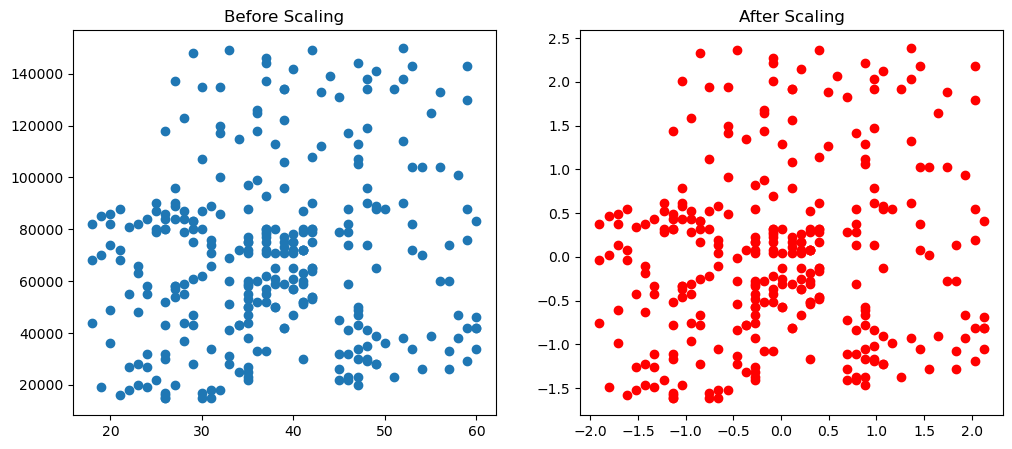

In [111]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")

plt.show()

C:\Users\robby\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

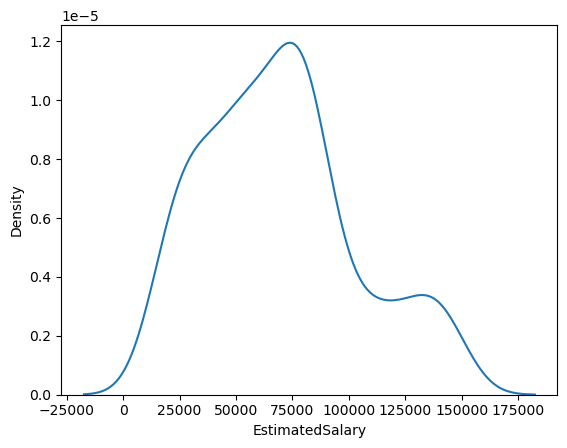

In [112]:
# model 
import seaborn as sns
sns.kdeplot(X_train['EstimatedSalary'])

C:\Users\robby\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

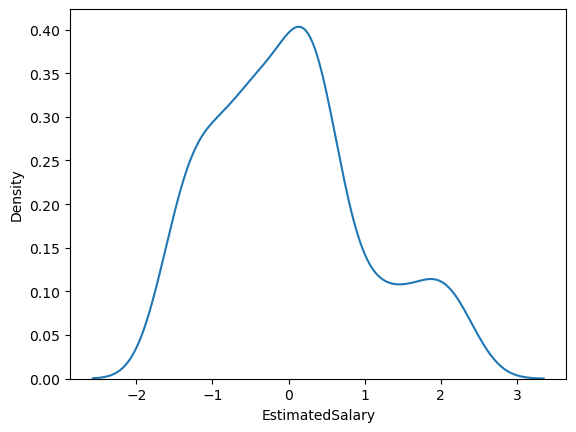

In [113]:
# model 
import seaborn as sns
sns.kdeplot(X_train_scaled['EstimatedSalary'])

In [114]:
X_train.describe()

,Age,EstimatedSalary
count,300.000000,300.000000
mean,37.840000,69363.333333
std,10.440198,33790.689416
min,18.000000,15000.000000
25%,29.000000,43000.000000
50%,37.000000,69500.000000
75%,46.000000,87000.000000
max,60.000000,150000.000000


In [115]:
# min-max
from sklearn.preprocessing import MinMaxScaler
scler_min_max=MinMaxScaler()

In [116]:
scler_min_max.fit(X_train)

MinMaxScaler()

In [117]:
X_train_min_max=scler_min_max.transform(X_train)

In [118]:
X_test_min_max=scler_min_max.transform(X_test)

In [119]:
X_train_min_max = pd.DataFrame(X_train_min_max, columns=X_train.columns)
X_test_min_max = pd.DataFrame(X_test_min_max, columns=X_test.columns)

In [120]:
np.round(X_train_min_max.describe(),1)

,Age,EstimatedSalary
count,300.0,300.0
mean,0.5,0.4
std,0.2,0.3
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.4
75%,0.7,0.5
max,1.0,1.0


In [121]:
X_test_min_max

,Age,EstimatedSalary
0,0.380952,0.718519
1,0.190476,0.148148
2,0.214286,0.118519
3,0.738095,0.155556
4,0.500000,0.414815
...,...,...
95,0.547619,0.222222
96,0.166667,0.133333
97,0.285714,0.474074
98,0.500000,0.340741


NameError: name 'X_train' is not defined

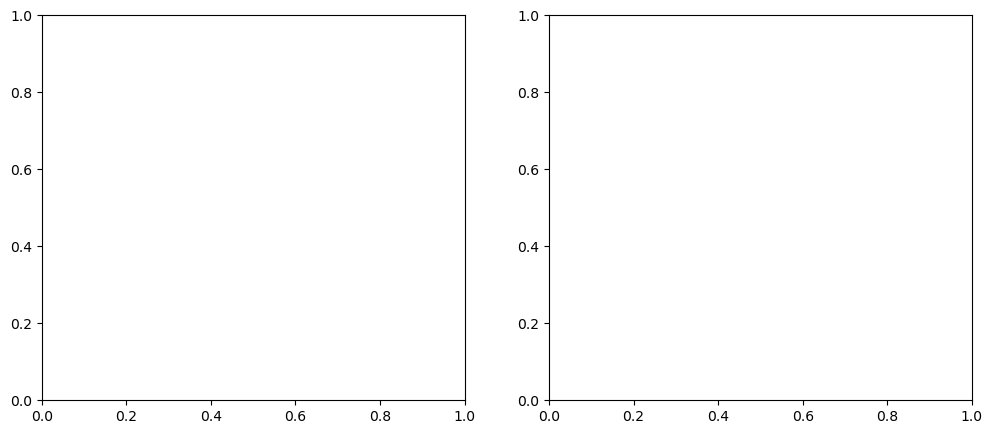

In [4]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_min_max['Age'], X_train_min_max['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")

plt.show()

# when we should use which technique

In [124]:
CGPA=0 to 1 min-max for the specific range you can use min-max

SALARY= if you dont know the range of the data you can use std_scaler

SyntaxError: invalid syntax (882521852.py, line 1)

# ENCODING

In [ ]:
df2=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day26-ordinal-encoding/customer.csv")

In [ ]:
df2.head()

In [ ]:
df2.to_csv("custmor.csv",index=False)

In [ ]:
df2.head()

In [ ]:
df2.sample(5)

In [ ]:
df2=df2.iloc[:,2:-1]

In [ ]:
df2.head()

In [ ]:
df2.shape

In [ ]:
X_train,X_test=train_test_split(df2,test_size=0.25)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
df2["review"].value_counts()

In [ ]:
df2["education"].value_counts()

In [ ]:
 from sklearn.preprocessing import OrdinalEncoder

In [ ]:
encoder=OrdinalEncoder(categories=[['Poor','Average','Good'],["School","UG","PG"]])

In [ ]:
encoder.fit(X_train)

In [ ]:
X_train_encode=encoder.transform(X_train)

In [ ]:
X_train_encode

In [ ]:
encoder.transform(X_test)

In [ ]:
df2.head()

In [ ]:
df2=df2[["gender","age"]]

In [ ]:
df2

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe=OneHotEncoder(drop="first",sparse=False,dtype=np.int32)

In [ ]:
ohe.fit(df2[["gender"]])

In [ ]:
ohe.transform(df2[["gender"]])

In [ ]:
# handle missing value

df3=pd.read_csv("titanic_train.csv")

In [ ]:
df3

In [ ]:
df3=df3[["Age","Fare","SibSp","Survived"]]

In [ ]:
df3.info()

In [ ]:
df3.head()

In [ ]:
df3.info()

In [ ]:
df3.isnull().mean()

In [ ]:
# numeric--> mean,median

# cat--> mode

In [ ]:
X_train,X_test=train_test_split(df3,test_size=0.25)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
mean_age=X_train["Age"].mean()

In [ ]:
X_train["Age"].fillna(mean_age)

In [ ]:
X_train["Age"].fillna(mean_age).isnull().sum()

In [ ]:
mediann_age=X_train["Age"].median()

In [ ]:
X_train["Age"].fillna(mediann_age)

In [ ]:
#sklearn

# simpleimputer

In [ ]:
df3["Cabin"].mode()

In [ ]:
df3["Cabin"].fillna(df3["Cabin"].mode()[0])

In [ ]:
# multivariate

# knnimputer